# Prepare github data

It is necessary to run when you running in google colab

In [1]:
# !git clone https://github.com/andriygav/SampleSizeLib
# !pip install SampleSizeLib/src
# !git clone https://github.com/ttgadaev/SampleSizeEstimation.git
# !mv SampleSizeEstimation/datasets datasets
# !mv SampleSizeEstimation/dumps dumps

# Import packages

In [2]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [3]:
from samplesizelib.linear.statistical import LagrangeEstimator
from samplesizelib.linear.statistical import LikelihoodRatioEstimator
from samplesizelib.linear.statistical import WaldEstimator

from samplesizelib.linear.heuristic import CrossValidationEstimator
from samplesizelib.linear.heuristic import BootstrapEstimator
from samplesizelib.linear.heuristic import LogisticRegressionEstimator

from samplesizelib.linear.bayesian import APVCEstimator
from samplesizelib.linear.bayesian import ACCEstimator
from samplesizelib.linear.bayesian import ALCEstimator
from samplesizelib.linear.bayesian import MaxUtilityEstimator
from samplesizelib.linear.bayesian import KLEstimator

from samplesizelib.shared.utils import Dataset

from samplesizelib.linear.models import RegressionModel
from samplesizelib.linear.models import LogisticModel

In [4]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [5]:
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.ticker as ticker
import locale

locale.setlocale(locale.LC_ALL, 'de_DE')

plt.rcParams["font.family"] = 'Djvu Serif'

plt.rcParams['text.usetex'] = True

plt.rcParams['text.latex.unicode'] = True

plt.rcParams['text.latex.preamble'] = [r'\usepackage[utf8x]{inputenc}', 
                                       r'\usepackage[english,russian]{babel}', 
                                       r'\usepackage{amsmath}']

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = 36
plt.rcParams['ytick.labelsize'] = 36
plt.rcParams['legend.fontsize'] = 36
plt.rcParams['axes.titlesize']=36
plt.rcParams['axes.labelsize']=36
plt.rcParams['figure.figsize'] = (24.0, 12.0)
plt.rcParams['font.size'] = 40

plt.rcParams['axes.formatter.use_locale'] = True

# Experiment config for all models

In [6]:
NAME_TO_MODEL = {
    'LagrangeEstimator': LagrangeEstimator, 
    'LikelihoodRatioEstimator': LikelihoodRatioEstimator, 
    'WaldEstimator': WaldEstimator, 
    'CrossValidationEstimator': CrossValidationEstimator, 
    'BootstrapEstimator': BootstrapEstimator, 
    'LogisticRegressionEstimator': LogisticRegressionEstimator, 
    'APVCEstimator': APVCEstimator, 
    'ACCEstimator': ACCEstimator, 
    'ALCEstimator': ALCEstimator, 
    'ALCEstimator': ALCEstimator, 
    'MaxUtilityEstimator': MaxUtilityEstimator, 
}

config = {
    'LagrangeEstimator': {'epsilon': 0.2, 
                          'alpha': 0.05, 
                          'beta': 0.2},
    'LikelihoodRatioEstimator': {'epsilon': 0.2, 
                                 'alpha': 0.05, 
                                 'beta': 0.2},
    'WaldEstimator': {'epsilon': 0.2, 
                      'alpha': 0.05, 
                      'beta': 0.2},
    'BootstrapEstimator': {'averaging': 100,
                           'epsilon': 0.5, 
                           'multiprocess': True, 
                           'progressbar': False},
    'CrossValidationEstimator': {'averaging': 100,
                                 'test_size': 0.5, 
                                 'epsilon': 0.05, 
                                 'multiprocess': True, 
                                 'progressbar': False},
    'APVCEstimator': {'averaging': 100,
                      'epsilon': 0.5, 
                      'multiprocess': True, 
                      'progressbar': False},
    'ACCEstimator': {'averaging': 100,
                     'length': 0.25,
                     'alpha': 0.05, 
                     'multiprocess': True, 
                     'progressbar': False},
    'ALCEstimator': {'averaging': 100,
                     'length': 0.5,
                     'alpha': 0.05, 
                     'multiprocess': True, 
                     'progressbar': False},
    'MaxUtilityEstimator': {'averaging': 100,
                            'c': 0.005, 
                            'multiprocess': True, 
                            'progressbar': False},
}

# The point where m* will be calculated
sample_sizes = [40, 80, 120, 160, 200, 240, 280, 320, 360, 400]
averaging = 50

# Boston Housing

In this computational experiment we are using Boston Housing dataset.

## Load dataset

In [7]:
dataset = pd.read_csv('datasets/boston.csv')

y = dataset.iloc[:, dataset.columns == 'answer'].values.reshape(-1)
X = dataset.iloc[:, dataset.columns != 'answer'].values

X = scale(X)
y = scale(y)
X = np.hstack((X, np.ones([len(X), 1])))

data = Dataset(X, y)

## Make prediction for different available sample size of dataset

### Prepara model

In [8]:
statmodel = RegressionModel
model_results = dict()

### LagrangeEstimator

In [9]:
key = 'LagrangeEstimator'
model = NAME_TO_MODEL[key](statmodel, **config[key])

In [10]:
# result = dict()
# list_of_m_size_mean = []
# list_of_m_size_std = []
# for m in tqdm(sample_sizes):
#     list_of_res = []
#     for _ in range(averaging):
#         X_m, y_m = data.sample(m=m, duplications=False)
#         res = model(X_m, y_m)
#         list_of_res.append(res['m*'])
#     list_of_m_size_mean.append(np.mean(list_of_res))
#     list_of_m_size_std.append(np.std(list_of_res))
    
# result['list_of_m_size_mean'] = np.array(list_of_m_size_mean)
# result['list_of_m_size_std'] = np.array(list_of_m_size_std)

In [11]:
# with open('dumps/DependingOnAvailableSampleSizeExperiment/{}.pkl'.format(key), 'wb') as f:
#     pickle.dump(result, f)

In [12]:
with open('dumps/DependingOnAvailableSampleSizeExperiment/{}.pkl'.format(key), 'rb') as f:
    result = pickle.load(f)

In [13]:
model_results[key] = result

### LikelihoodRatioEstimator

In [14]:
key = 'LikelihoodRatioEstimator'
model = NAME_TO_MODEL[key](statmodel, **config[key])

In [15]:
# result = dict()
# list_of_m_size_mean = []
# list_of_m_size_std = []
# for m in tqdm(sample_sizes):
#     list_of_res = []
#     for _ in range(averaging):
#         X_m, y_m = data.sample(m=m, duplications=False)
#         res = model(X_m, y_m)
#         list_of_res.append(res['m*'])
#     list_of_m_size_mean.append(np.mean(list_of_res))
#     list_of_m_size_std.append(np.std(list_of_res))
    
# result['list_of_m_size_mean'] = np.array(list_of_m_size_mean)
# result['list_of_m_size_std'] = np.array(list_of_m_size_std)

In [16]:
# with open('dumps/DependingOnAvailableSampleSizeExperiment/{}.pkl'.format(key), 'wb') as f:
#     pickle.dump(result, f)

In [17]:
with open('dumps/DependingOnAvailableSampleSizeExperiment/{}.pkl'.format(key), 'rb') as f:
    result = pickle.load(f)

In [18]:
model_results[key] = result

### WaldEstimator

In [19]:
key = 'WaldEstimator'
model = NAME_TO_MODEL[key](statmodel, **config[key])

In [20]:
# result = dict()
# list_of_m_size_mean = []
# list_of_m_size_std = []
# for m in tqdm(sample_sizes):
#     list_of_res = []
#     for _ in range(averaging):
#         X_m, y_m = data.sample(m=m, duplications=False)
#         res = model(X_m, y_m)
#         list_of_res.append(res['m*'])
#     list_of_m_size_mean.append(np.mean(list_of_res))
#     list_of_m_size_std.append(np.std(list_of_res))
    
# result['list_of_m_size_mean'] = np.array(list_of_m_size_mean)
# result['list_of_m_size_std'] = np.array(list_of_m_size_std)

In [21]:
# with open('dumps/DependingOnAvailableSampleSizeExperiment/{}.pkl'.format(key), 'wb') as f:
#     pickle.dump(result, f)

In [22]:
with open('dumps/DependingOnAvailableSampleSizeExperiment/{}.pkl'.format(key), 'rb') as f:
    result = pickle.load(f)

In [23]:
model_results[key] = result

### BootstrapEstimator

In [24]:
key = 'BootstrapEstimator'
model = NAME_TO_MODEL[key](statmodel, **config[key])

In [25]:
# result = dict()
# list_of_m_size_mean = []
# list_of_m_size_std = []
# for m in tqdm(sample_sizes):
#     list_of_res = []
#     for _ in range(averaging):
#         X_m, y_m = data.sample(m=m, duplications=False)
#         res = model(X_m, y_m)
#         list_of_res.append(res['m*'])
#     list_of_m_size_mean.append(np.mean(list_of_res))
#     list_of_m_size_std.append(np.std(list_of_res))
    
# result['list_of_m_size_mean'] = np.array(list_of_m_size_mean)
# result['list_of_m_size_std'] = np.array(list_of_m_size_std)

In [26]:
# with open('dumps/DependingOnAvailableSampleSizeExperiment/{}.pkl'.format(key), 'wb') as f:
#     pickle.dump(result, f)

In [27]:
with open('dumps/DependingOnAvailableSampleSizeExperiment/{}.pkl'.format(key), 'rb') as f:
    result = pickle.load(f)

In [28]:
model_results[key] = result

### CrossValidationEstimator

In [29]:
key = 'CrossValidationEstimator'
model = NAME_TO_MODEL[key](statmodel, **config[key])

In [30]:
# result = dict()
# list_of_m_size_mean = []
# list_of_m_size_std = []
# for m in tqdm(sample_sizes):
#     list_of_res = []
#     for _ in range(averaging):
#         X_m, y_m = data.sample(m=m, duplications=False)
#         res = model(X_m, y_m)
#         list_of_res.append(res['m*'])
#     list_of_m_size_mean.append(np.mean(list_of_res))
#     list_of_m_size_std.append(np.std(list_of_res))
    
# result['list_of_m_size_mean'] = np.array(list_of_m_size_mean)
# result['list_of_m_size_std'] = np.array(list_of_m_size_std)

In [31]:
# with open('dumps/DependingOnAvailableSampleSizeExperiment/{}.pkl'.format(key), 'wb') as f:
#     pickle.dump(result, f)

In [32]:
with open('dumps/DependingOnAvailableSampleSizeExperiment/{}.pkl'.format(key), 'rb') as f:
    result = pickle.load(f)

In [33]:
model_results[key] = result

### APVCEstimator

In [34]:
key = 'APVCEstimator'
model = NAME_TO_MODEL[key](statmodel, **config[key])

In [35]:
# result = dict()
# list_of_m_size_mean = []
# list_of_m_size_std = []
# for m in tqdm(sample_sizes):
#     list_of_res = []
#     for _ in range(averaging):
#         X_m, y_m = data.sample(m=m, duplications=False)
#         res = model(X_m, y_m)
#         list_of_res.append(res['m*'])
#     list_of_m_size_mean.append(np.mean(list_of_res))
#     list_of_m_size_std.append(np.std(list_of_res))
    
# result['list_of_m_size_mean'] = np.array(list_of_m_size_mean)
# result['list_of_m_size_std'] = np.array(list_of_m_size_std)

In [36]:
# with open('dumps/DependingOnAvailableSampleSizeExperiment/{}.pkl'.format(key), 'wb') as f:
#     pickle.dump(result, f)

In [37]:
with open('dumps/DependingOnAvailableSampleSizeExperiment/{}.pkl'.format(key), 'rb') as f:
    result = pickle.load(f)

In [38]:
model_results[key] = result

### ACCEstimator

In [39]:
key = 'ACCEstimator'
model = NAME_TO_MODEL[key](statmodel, **config[key])

In [40]:
# result = dict()
# list_of_m_size_mean = []
# list_of_m_size_std = []
# for m in tqdm(sample_sizes):
#     list_of_res = []
#     for _ in range(averaging):
#         X_m, y_m = data.sample(m=m, duplications=False)
#         res = model(X_m, y_m)
#         list_of_res.append(res['m*'])
#     list_of_m_size_mean.append(np.mean(list_of_res))
#     list_of_m_size_std.append(np.std(list_of_res))
    
# result['list_of_m_size_mean'] = np.array(list_of_m_size_mean)
# result['list_of_m_size_std'] = np.array(list_of_m_size_std)

In [41]:
# with open('dumps/DependingOnAvailableSampleSizeExperiment/{}.pkl'.format(key), 'wb') as f:
#     pickle.dump(result, f)

In [42]:
with open('dumps/DependingOnAvailableSampleSizeExperiment/{}.pkl'.format(key), 'rb') as f:
    result = pickle.load(f)

In [43]:
model_results[key] = result

### ALCEstimator

In [44]:
key = 'ALCEstimator'
model = NAME_TO_MODEL[key](statmodel, **config[key])

In [45]:
# result = dict()
# list_of_m_size_mean = []
# list_of_m_size_std = []
# for m in tqdm(sample_sizes):
#     list_of_res = []
#     for _ in range(averaging):
#         X_m, y_m = data.sample(m=m, duplications=False)
#         res = model(X_m, y_m)
#         list_of_res.append(res['m*'])
#     list_of_m_size_mean.append(np.mean(list_of_res))
#     list_of_m_size_std.append(np.std(list_of_res))
    
# result['list_of_m_size_mean'] = np.array(list_of_m_size_mean)
# result['list_of_m_size_std'] = np.array(list_of_m_size_std)

In [46]:
# with open('dumps/DependingOnAvailableSampleSizeExperiment/{}.pkl'.format(key), 'wb') as f:
#     pickle.dump(result, f)

In [47]:
with open('dumps/DependingOnAvailableSampleSizeExperiment/{}.pkl'.format(key), 'rb') as f:
    result = pickle.load(f)

In [48]:
model_results[key] = result

### MaxUtilityEstimator

In [49]:
key = 'MaxUtilityEstimator'
model = NAME_TO_MODEL[key](statmodel, **config[key])

In [50]:
# result = dict()
# list_of_m_size_mean = []
# list_of_m_size_std = []
# for m in tqdm(sample_sizes):
#     list_of_res = []
#     for _ in range(averaging):
#         X_m, y_m = data.sample(m=m, duplications=False)
#         res = model(X_m, y_m)
#         list_of_res.append(res['m*'])
#     list_of_m_size_mean.append(np.mean(list_of_res))
#     list_of_m_size_std.append(np.std(list_of_res))
    
# result['list_of_m_size_mean'] = np.array(list_of_m_size_mean)
# result['list_of_m_size_std'] = np.array(list_of_m_size_std)

In [51]:
# with open('dumps/DependingOnAvailableSampleSizeExperiment/{}.pkl'.format(key), 'wb') as f:
#     pickle.dump(result, f)

In [52]:
with open('dumps/DependingOnAvailableSampleSizeExperiment/{}.pkl'.format(key), 'rb') as f:
    result = pickle.load(f)

In [53]:
model_results[key] = result

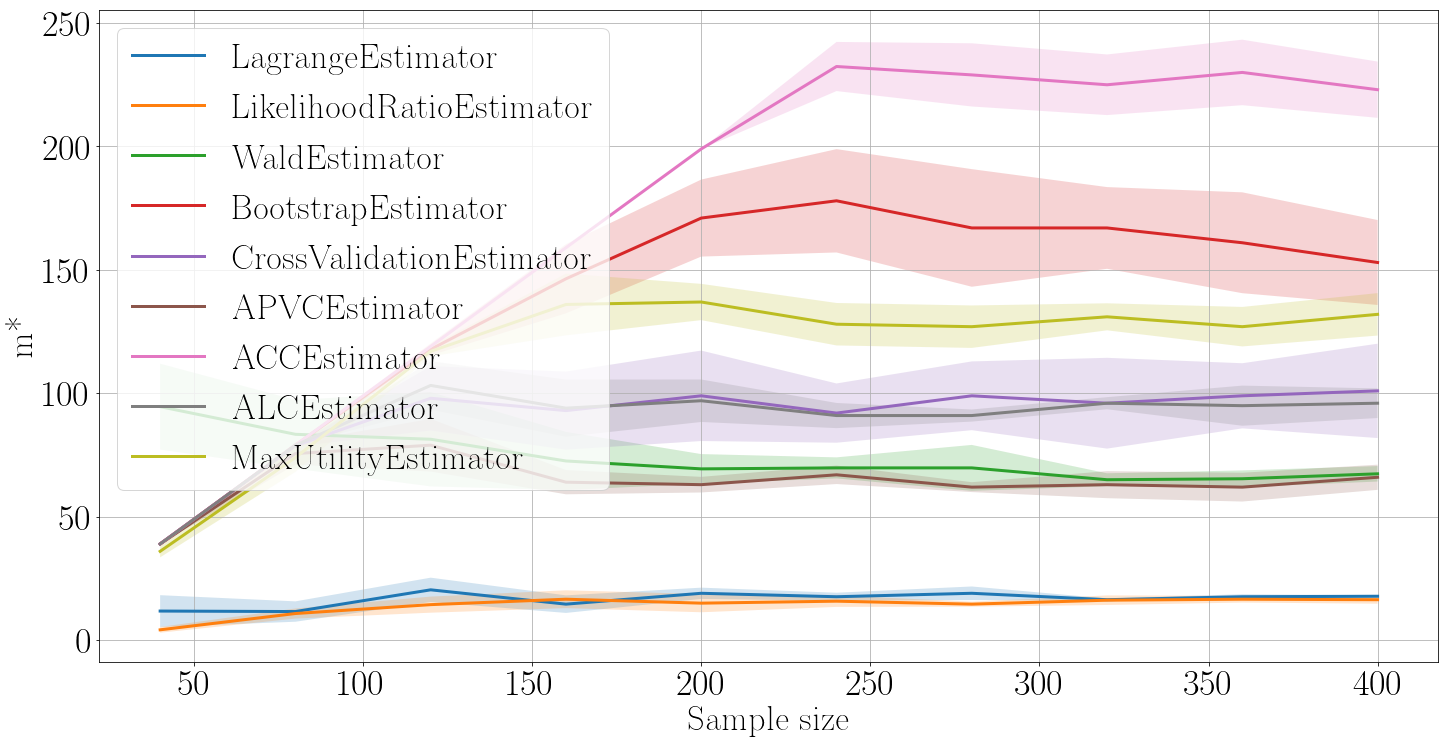

In [54]:
for key in model_results:
    mean, std = model_results[key]['list_of_m_size_mean'], model_results[key]['list_of_m_size_std']
    plt.plot(sample_sizes, mean, label = key)
    plt.fill_between(sample_sizes, mean-std, mean+std, alpha=0.2)
    
plt.legend(loc = 'upper left')
plt.xlabel('Sample size')
plt.ylabel('m*')
plt.grid()
plt.show()